In [1]:
using CSV
using DataFrames
using Seaborn
using Statistics
using Distributions
using Plots

In [2]:
data = DataFrame(CSV.File("sensor_data_200.txt";
        header=["data", "time", "ir", "lidar"]))

,data,time,ir,lidar
,Int64,Int64,Int64,Int64
1,20180122,95819,305,214
2,20180122,95822,299,211
3,20180122,95826,292,199
4,20180122,95829,321,208
5,20180122,95832,298,212
6,20180122,95835,327,212
7,20180122,95838,293,215
8,20180122,95840,309,218
9,20180122,95843,323,208


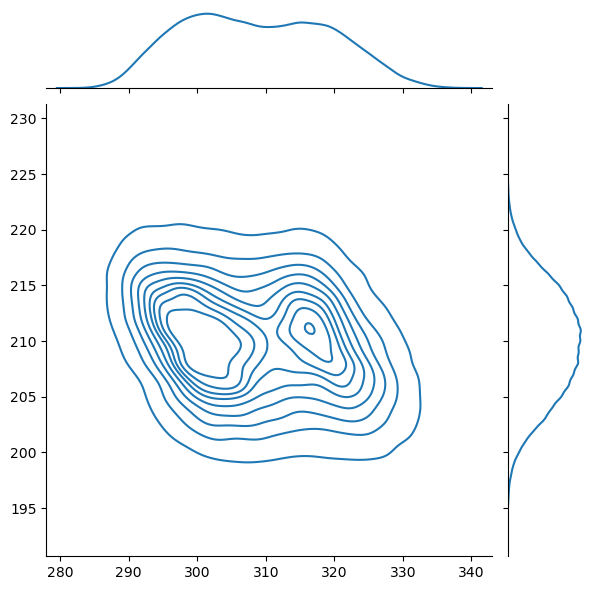

PyObject <seaborn.axisgrid.JointGrid object at 0x7feee98f3220>

In [4]:
d = data[:, ["ir", "lidar"]]
Seaborn.jointplot(x="ir", y="lidar", d.ir, d.lidar,   kind="kde")

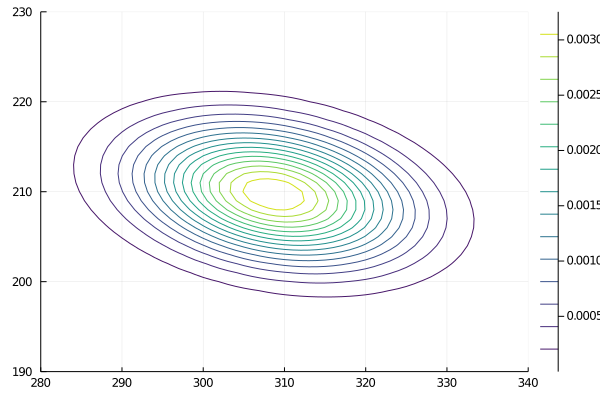

In [9]:
mu = [mean(d.ir), mean(d.lidar)]
sigma = [var(d.ir) cov(d.ir, d.lidar) ; 
    cov(d.ir, d.lidar) var(d.lidar)]
irlidar = MvNormal(mu, sigma)

x = range(280,340, step=1)
y = range(190, 230, step=1)
z = [pdf(irlidar,[i, j]) for j in y, i in x]
cp = Plots.contour(x, y, z, color=:viridis)